It's a summary after the long fine-tuning results in build_models_08.ipynb.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('dark_background')
#plt.style.use('seaborn-colorblind')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Final grid search results

In [2]:
def plot_score_time(df):
    plt.figure()
    # plot the positive scores
    sns.scatterplot(data=df[df.mean_test_score > 0], x='param_svr__C', y='param_svr__gamma', 
                    size='mean_fit_time', hue='mean_test_score', palette='Blues_r')
    # plot the negative scores
    plt.scatter(x=df.loc[df.mean_test_score < 0, 'param_svr__C'], 
                y=df.loc[df.mean_test_score < 0, 'param_svr__gamma'],
                marker='X')
    # mark the best score
    test_max = np.argmax(df.mean_test_score)
    plt.scatter(df.param_svr__C[test_max], df.param_svr__gamma[test_max], 
                edgecolors='orange', facecolors='none', linewidths=2)
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(bbox_to_anchor=(1.05, 1))

In [2]:
def n_scores(df):
    scores = []
    for n in np.unique(df.param_nmf__n_components):
        data = df[df.param_nmf__n_components == n]
        max_score = data.mean_test_score.max()
        scores = np.hstack((scores, 
                            data.loc[data.mean_test_score == max_score, 'mean_test_score'].values))
    return scores

### CaCO3

In [3]:
caco3_df = pd.concat([pd.read_csv('results/caco3_grid_nmf+svr_20210820.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_1_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_2-1_20210823.csv', index_col=0),
                      pd.read_csv('results/caco3_grid_nmf+svr_2-2_20210823.csv', index_col=0)],
                     axis=0, join='inner').reset_index(drop=True)
caco3_df.shape

(349, 21)

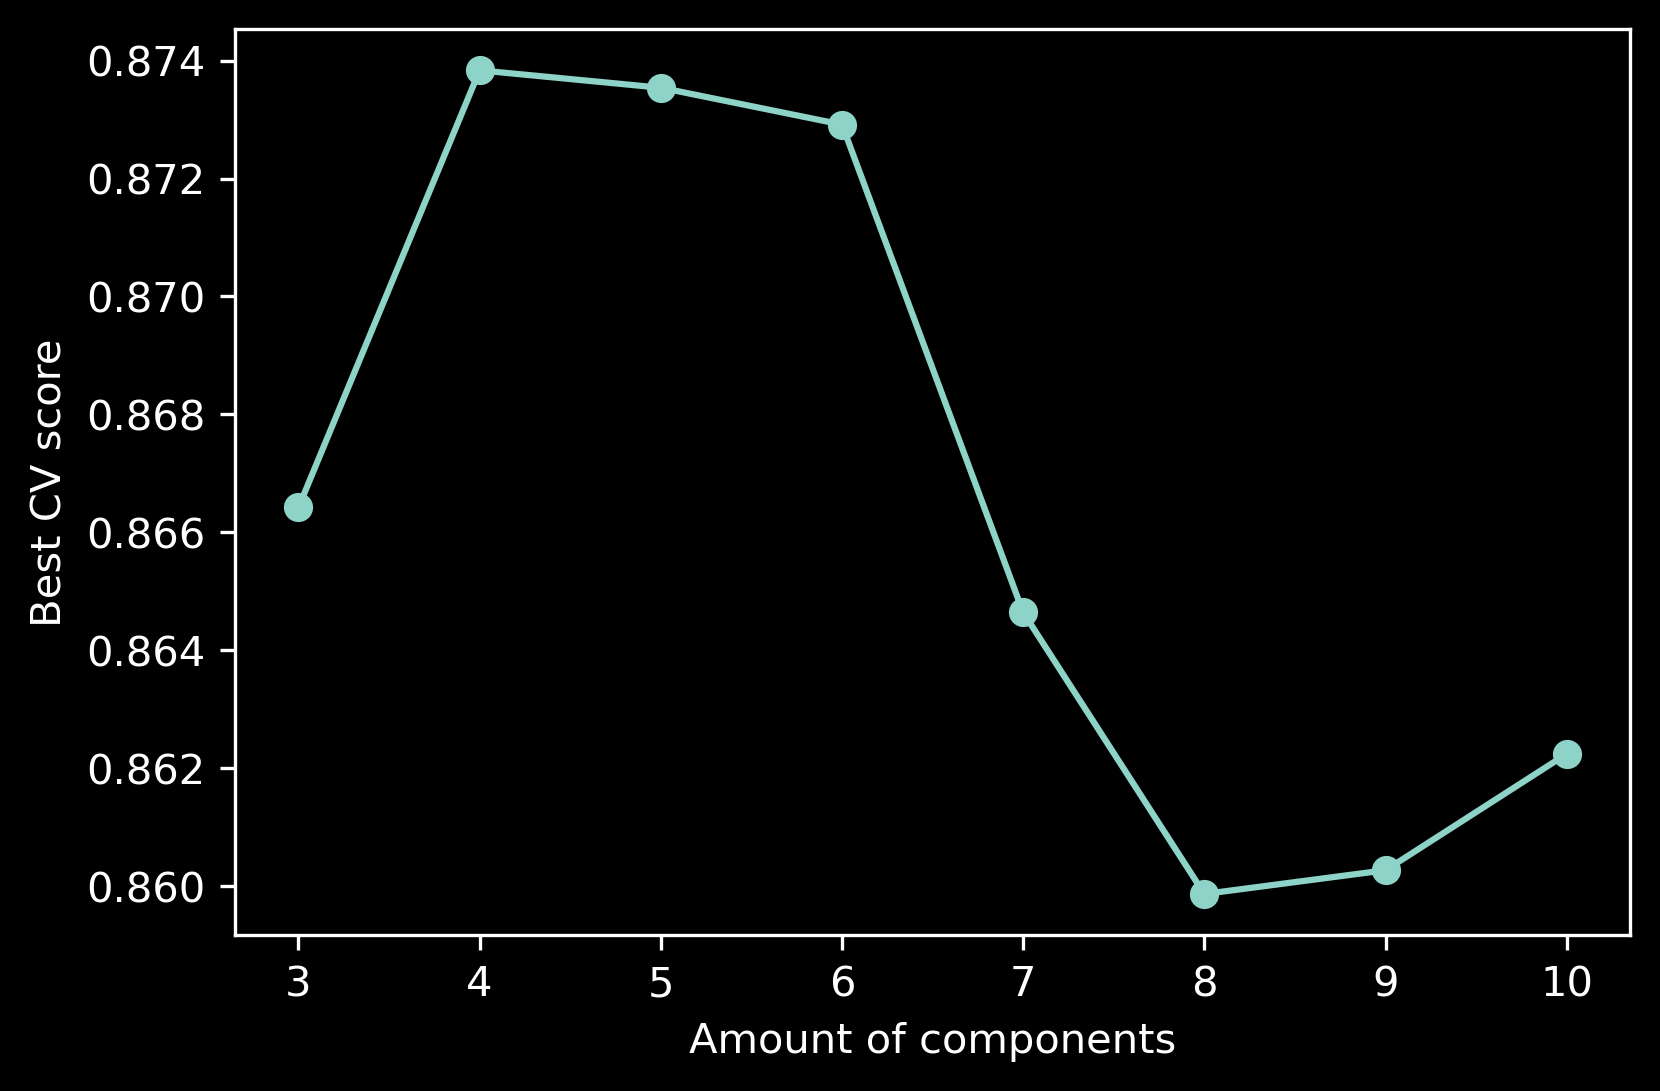

In [4]:
plt.plot(np.unique(caco3_df.param_nmf__n_components), n_scores(caco3_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
plt.savefig('results/caco3_scores_components_{}.png'.format(date))

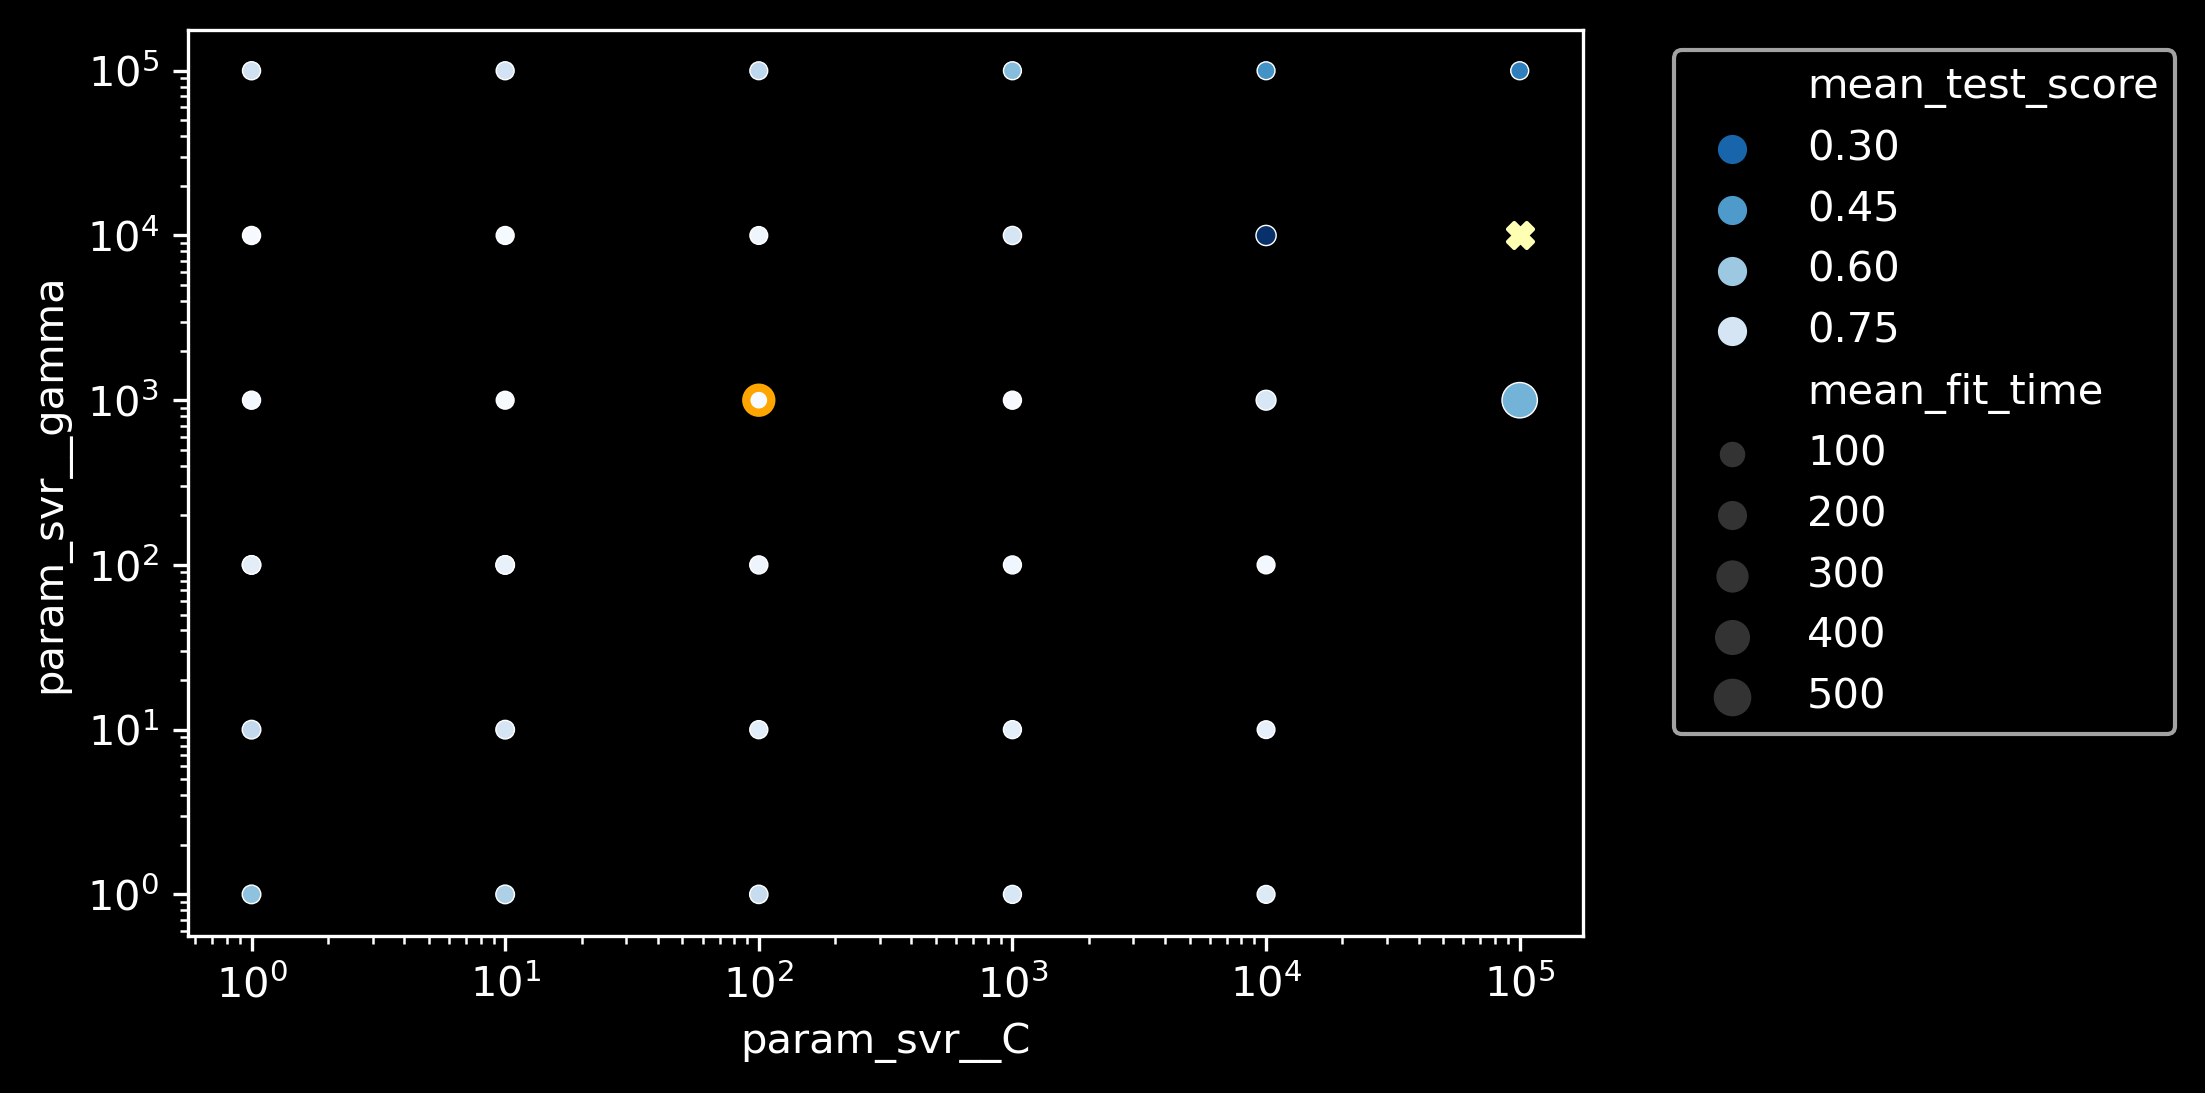

In [11]:
df = caco3_df[caco3_df.param_nmf__n_components == 4].reset_index(drop=True)
plot_score_time(df)
plt.savefig('results/caco3_grid_4nmf+svr_{}.png'.format(date))

### TOC

In [5]:
toc_df = pd.concat([pd.read_csv('results/toc_grid_nmf+svr_20210821.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_20210822.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_20210823.csv', index_col=0),
                    pd.read_csv('results/toc_grid_nmf+svr_2_20210823.csv', index_col=0)],
                   axis=0, join='inner').reset_index(drop=True)
toc_df.shape

(408, 21)

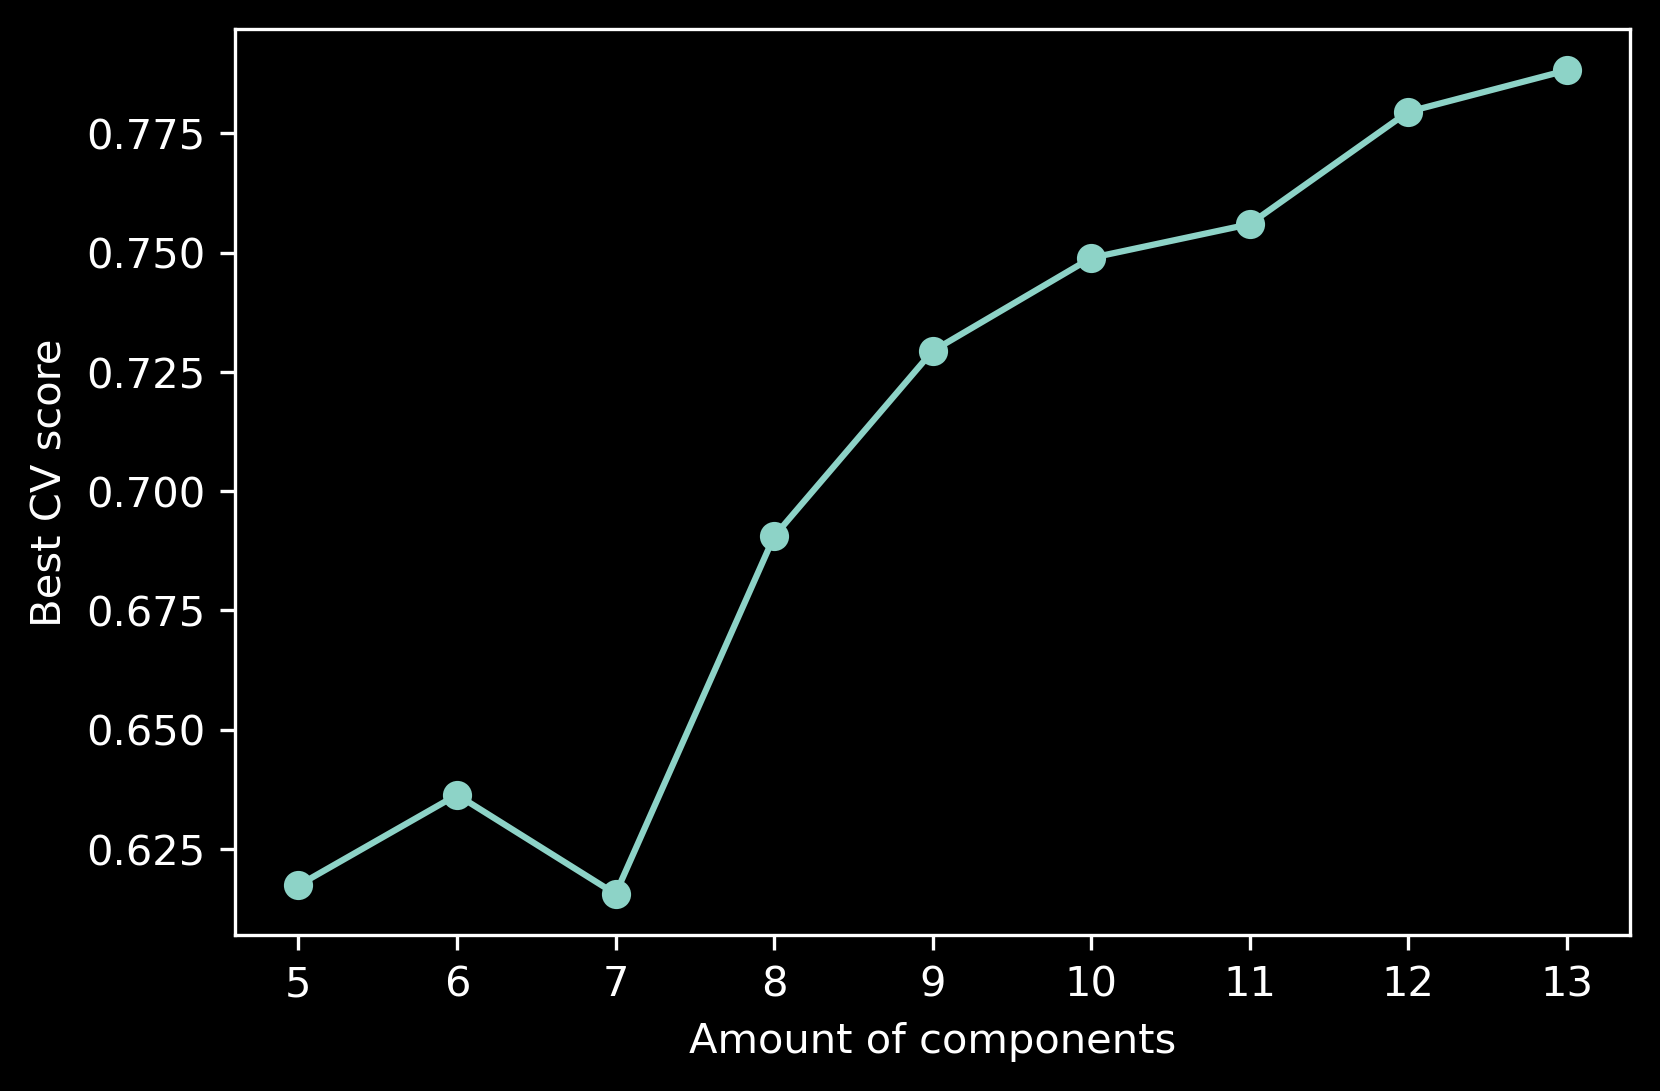

In [6]:
plt.plot(np.unique(toc_df.param_nmf__n_components), n_scores(toc_df), marker='o')
plt.xlabel('Amount of components')
plt.ylabel('Best CV score')
plt.savefig('results/toc_scores_components_{}.png'.format(date))

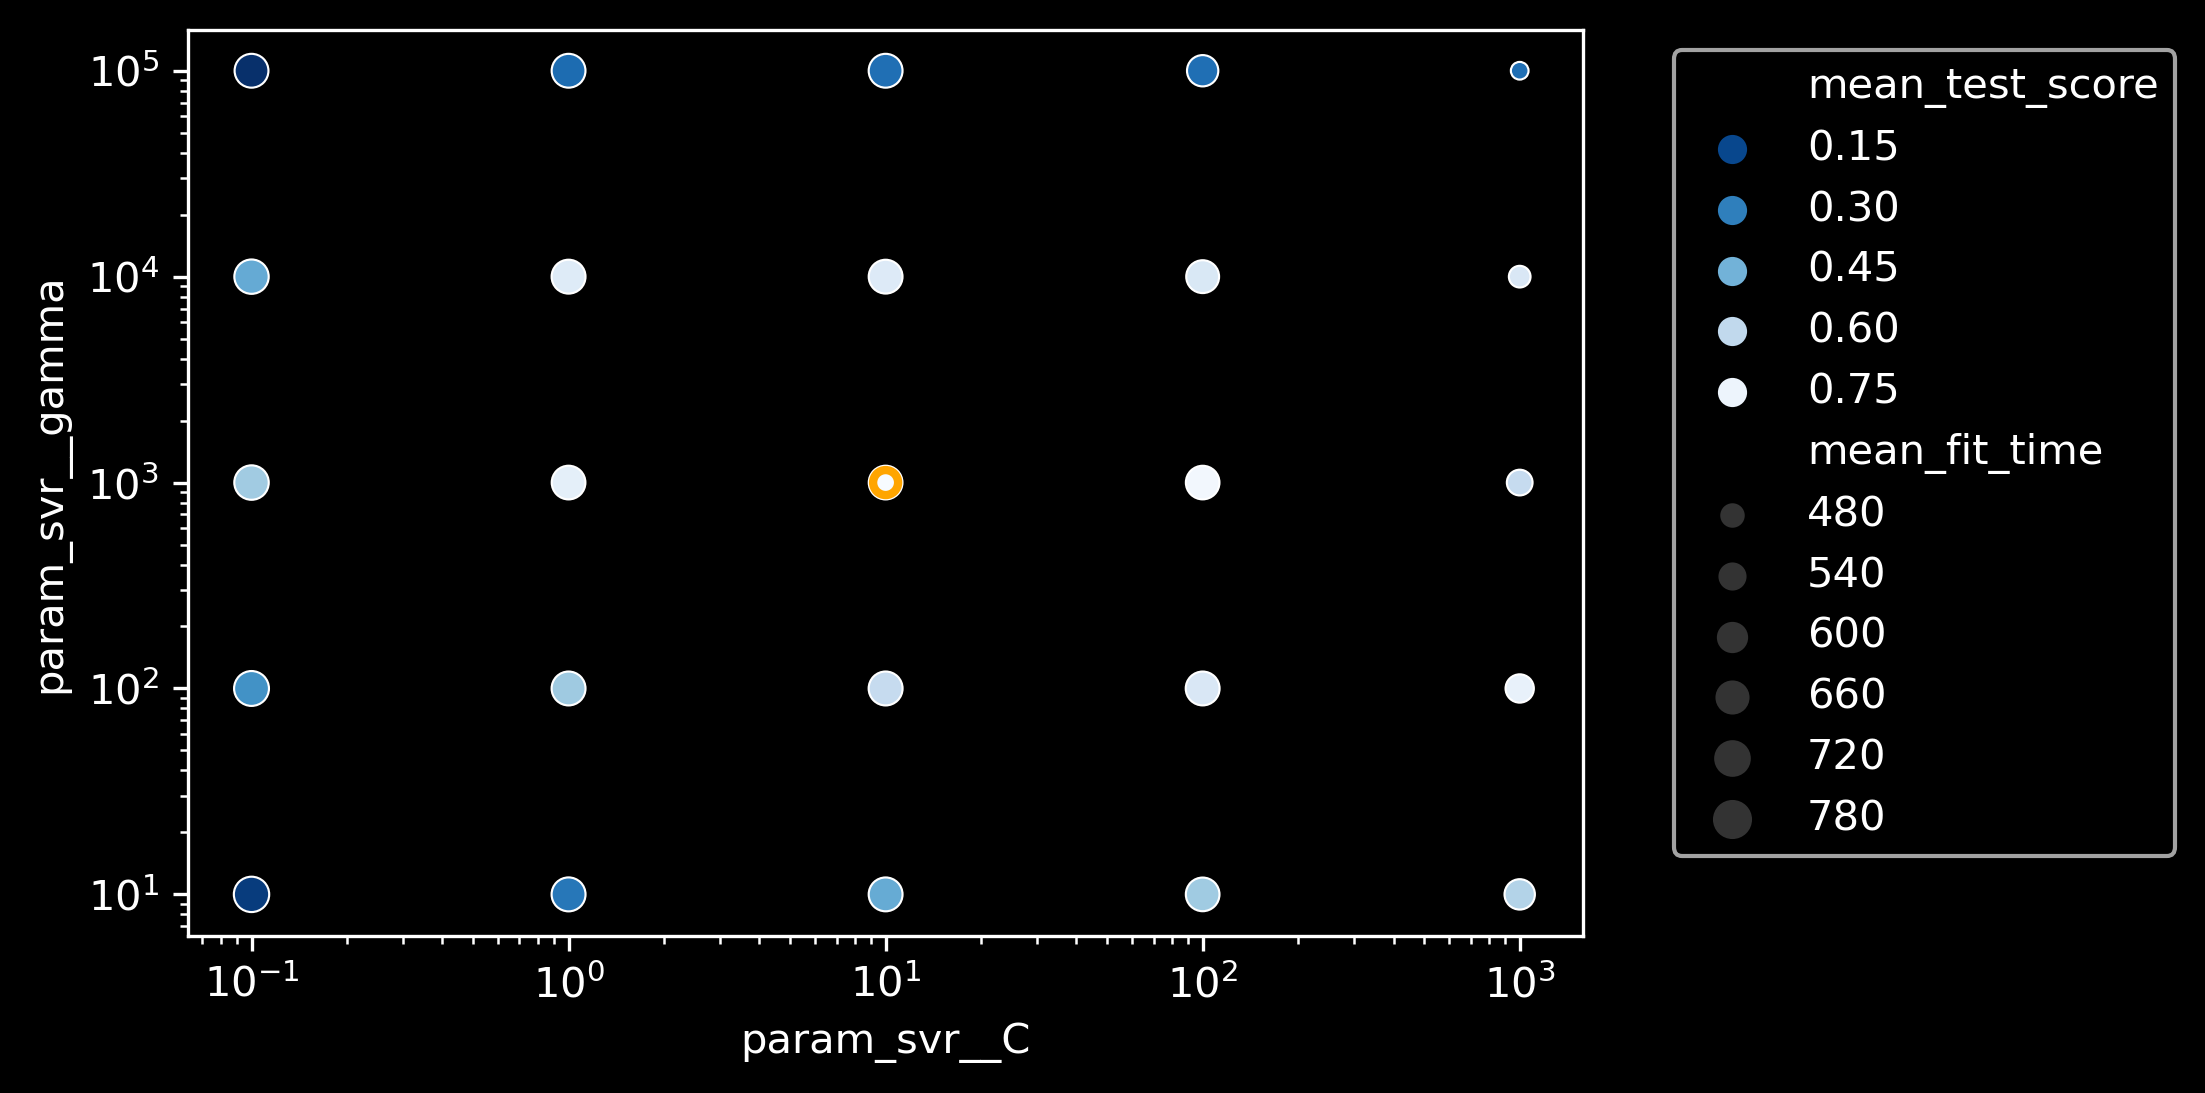

In [19]:
df = toc_df[toc_df.param_nmf__n_components == 13].reset_index(drop=True)
plot_score_time(df)
plt.savefig('results/toc_grid_13nmf+svr_{}.png'.format(date))

In [22]:
grids_df = pd.concat([caco3_df, toc_df], axis=0, join='outer')
grids_df['measurement'] = np.hstack((['CaCO3' for _ in range(len(caco3_df))], 
                          ['TOC' for _ in range(len(toc_df))]))
grids_df.to_csv('results/grid_caco3+toc_compile_{}.csv'.format(date))
grids_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 407
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_fit_time            757 non-null    float64
 1   std_fit_time             757 non-null    float64
 2   mean_score_time          757 non-null    float64
 3   std_score_time           757 non-null    float64
 4   param_nmf__n_components  757 non-null    int64  
 5   param_svr__C             757 non-null    float64
 6   param_svr__gamma         757 non-null    float64
 7   params                   757 non-null    object 
 8   split0_test_score        757 non-null    float64
 9   split1_test_score        757 non-null    float64
 10  split2_test_score        757 non-null    float64
 11  split3_test_score        757 non-null    float64
 12  split4_test_score        757 non-null    float64
 13  split5_test_score        757 non-null    float64
 14  split6_test_score        7

## Summary
There are 349 and 408 parameter sets tried to find the optimal set. The parameters are initialized based on the result of the pilottest. In general, the optimal parameters are found at the middle of the CV score platue. Only several exceptions caused by technical issue are there.